<a href="https://colab.research.google.com/github/prashanthpasikanti/Covid-Sentiment-Prediction/blob/main/Data_Science_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name :** Prashanth Pasikanti

**Project Statement:**

Create classification model to predict the sentiment either(Positive or Negative)based on Covid Tweets.

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
ps=PorterStemmer()
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df=pd.read_excel("Corona_NLP.xlsx")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.shape

(41157, 6)

In [ ]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Location Column contains 8590 null values. But we don't need Location column for our sentiment analysis. Hence we neglect these null values.

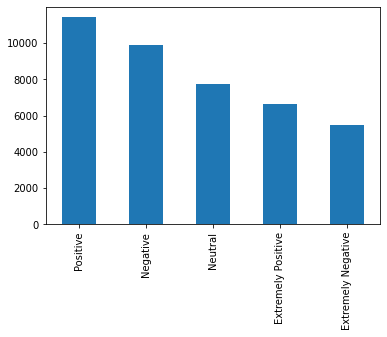

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')

**Data Preprocessing**

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')

@user has been removed from OriginalTweet and a new column has been added to data frame without @user

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

Urls and HTTPS have been removed from Tweet Column

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
OriginalTweets=df['Tweet'].values.tolist()

In [ ]:
stem_OriginalTweet=[ps.stem(i) for i in OriginalTweets]

In [ ]:
df['Tweets']=stem_OriginalTweet
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet,Tweets
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,coronavirus australia: woolworths to give elde...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV...","me, ready to go at supermarket during the #cov..."
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...,airline pilots offering to stock supermarket s...
41153,44952,89904,NaN,2020-04-14,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...,response to complaint not provided citing covi...
41154,44953,89905,NaN,2020-04-14,You know itÂ’s getting tough when @KameronWild...,Positive,You know itÂ’s getting tough when is rationi...,you know itâ’s getting tough when is rationi...
41155,44954,89906,NaN,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...,is it wrong that the smell of hand sanitizer i...


Converted 'Tweet' words to lower case and a new column 'Tweets' has been created which contains lower case words of 'Tweet'

In [ ]:
df.pop("Tweet")

0                                                         
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂ’s getting tough when   is rationi...
41155    Is it wrong that the smell of hand sanitizer i...
41156     Well new/used Rift S are going for $700.00 on...
Name: Tweet, Length: 41157, dtype: object

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweets
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia: woolworths to give elde...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, ready to go at supermarket during the #cov..."


Tweet column has been removed now.

In [ ]:
df['Tweets'] = df['Tweets'].str.replace('[^a-zA-Z#]+',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweets
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the #covi...


Special characters, numbers and punctuations have been removed from 'Tweets'

In [ ]:
Tweets=df['Tweets'].values.tolist()

In [ ]:
res=[lm.lemmatize(i) for i in Tweets]

In [ ]:
sw= stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
res1=[]
for i in res:
  t=re.sub('[^A-Za-z0-9]',' ',i)
  t=t.lower()
  t=word_tokenize(t)
  t=[i for i in t if i not in sw]
  t=[lm.lemmatize(i) for i in t]
  t=" ".join(t)
  res1.append(t)  

In [ ]:
df['Tweets']=res1

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweets
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty x x x x please panic enou...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak x x x x pa...


Stopwords have been removed now.

In [ ]:
tokenized_tweet = df['Tweets'].apply(lambda x: x.split())

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweets
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty x x x x please panic enou...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak x x x x pa...


In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [ ]:
df['Tweets']  = tokenized_tweet

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweets
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty x x x x please panic enou...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak x x x x pa...


Tokenization and Stemming done

In [ ]:
new_df = df[['Tweets','Sentiment']]

In [ ]:
new_df.head()

,Tweets,Sentiment
0,,Neutral
1,advice talk neighbour family exchange phone nu...,Positive
2,coronavirus australia woolworth give elderly d...,Positive
3,food stock one empty x x x x please panic enou...,Positive
4,ready go supermarket covid outbreak x x x x pa...,Extremely Negative


In [ ]:
new_df.isnull().sum()

Tweets       0
Sentiment    0
dtype: int64

In [ ]:
new_df['Sentiment']=new_df['Sentiment'].replace(['Extremely Positive','Extremely Negative'],['Positive','Negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

Sentiments 'Extremely Positive' changed to 'Positive' and 'Extremely Negative' changed to 'Negative' 

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values)
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


Dataset splitted into training and testing data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweets.values)
X_valid = vectorizer.transform(valid.Tweets.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 33950)
X_train.shape :  (8232, 33950)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


Counter Vector used

**a)Multinomial Naive Bayes Classification**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8009719058466211
Validation accuracy Score :  0.6867103984450923
              precision    recall  f1-score   support

    Negative       0.76      0.68      0.72      3421
     Neutral       0.26      0.72      0.38       548
    Positive       0.81      0.69      0.74      4263

    accuracy                           0.69      8232
   macro avg       0.61      0.70      0.61      8232
weighted avg       0.75      0.69      0.71      8232



**b)SVM Classification**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9383447228549734
Validation accuracy Score :  0.7728377065111759
              precision    recall  f1-score   support

    Negative       0.77      0.79      0.78      3009
     Neutral       0.67      0.66      0.67      1573
    Positive       0.82      0.81      0.81      3650

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



**c)KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn_prediction = knn.predict(X_valid)
knn_accuracy = accuracy_score(y_valid,knn_prediction)
print("Training accuracy Score    : ",knn.score(X_train,y_train))
print("Validation accuracy Score : ",knn_accuracy )
print(classification_report(knn_prediction,y_valid))

Training accuracy Score    :  0.3688382687927107
Validation accuracy Score :  0.321064139941691
              precision    recall  f1-score   support

    Negative       0.20      0.66      0.30       908
     Neutral       0.88      0.21      0.34      6290
    Positive       0.19      0.67      0.30      1034

    accuracy                           0.32      8232
   macro avg       0.42      0.51      0.31      8232
weighted avg       0.71      0.32      0.33      8232



**Test Accuracy of all models in descending order**

In [ ]:
models = pd.DataFrame({
    'Model': ['Naive Bayes','SVM', 'KNN'],
    'Test accuracy': [NB_accuracy,svc_accuracy,knn_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,SVM,0.772838
0,Naive Bayes,0.686710
2,KNN,0.321064


The Model with best accuracy is **SVM** with 0.772838 test accuracy